https://keras.io/examples/vision/image_classification_with_vision_transformer/

In [ ]:
!pip install pathlib2
!pip install -U tensorflow-addons

In [ ]:
### install necessary packages if in colab
def run_subprocess_command(cmd):
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    for line in process.stdout:
        print(line.decode().strip())


import sys, subprocess

IN_COLAB = "google.colab" in sys.modules
colab_requirements = [
    "pip install tf-nightly-gpu-2.0-preview==2.0.0.dev20190513",
    "pip install librosa",
]
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.io import FixedLenFeature, parse_single_example
#from librosa.core.time_frequency import mel_frequencies
from librosa import mel_frequencies
from pathlib2 import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import math

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from csv import DictReader
from numpy import save

from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/Shareddrives/Robot Ear/data/nsynth-valid/audio"

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# def load_and_process_audio(file_path):
#     # Load audio file
#     audio, sr = librosa.load(file_path, sr=None)
#     # Extract mel spectrogram
#     mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)

#     # Convert to decibels (log scale)
#     mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
#     return mel_spectrogram_db, sr

# # Example: Load and process all .wav files in the 'audio' folder
# mel_spectrograms = []
# sample_rates = []
# y_train = []


# y = pd.read_csv("/content/drive/Shareddrives/Robot Ear/data/nsynth-valid/examples.csv")

# l = y["_key"]
# l = list(l)

# for file_name in os.listdir(folder_path):

#     # make sure we don't have any extras
#     if file_name.split(".")[0] not in l:
#         continue

#     if file_name.endswith(".wav"):
#         # y train code
#         with open("/content/drive/Shareddrives/Robot Ear/data/nsynth-valid/examples.csv") as csvfile:
#             reader = DictReader(csvfile)

#             for row in reader:

#                 if row['_key'] + ".wav" == file_name:
#                     # print("found")
#                     y_train.append(row['pitch'])
#         # end y train code

#         # file_path = os.path.join(folder_path, file_name)
#         # mel_spectrogram_db, sr = load_and_process_audio(file_path)
#         # mel_spectrograms.append(mel_spectrogram_db)
#         # sample_rates.append(sr)

# # # Now, mel_spectrograms contains a list of mel spectrograms for each audio file
# # # You can use this data for further analysis or input to a machine learning model


In [ ]:
# print(y_train)

In [ ]:


# def freq_to_note(freq):
#     notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

#     note_number = 12 * math.log2(freq / 440) + 49
#     note_number = round(note_number)

#     note = (note_number - 1 ) % len(notes)
#     note = notes[note]

#     octave = (note_number + 8 ) // len(notes)

#     return note, octave
# name_y_train = []
# for i in y_train:
#     note, octave = freq_to_note(int(i))
#     name_y_train.append(str(note))


In [ ]:
# print(name_y_train)
# note_names = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
# print(len(name))

In [ ]:
# index_y_train = []
# for i in name_y_train:
#     index_y_train.append(list(note_names).index(i))
# print(index_y_train)

In [ ]:
# old_y_train = l
# y_train_save = np.array(index_y_train)
# save('/content/drive/My Drive/new_y_train.npy', y_train_save)


In [ ]:
# y_train = y_train_save

In [ ]:
# convert y_train pitches to note names
# name = np.array(["C0","C#0","D0","D#0","E0","F0","F#0","G0","G#0","A0","A#0","B0","C1","C#1","D1","D#1","E1","F1","F#1","G1","G#1","A1","A#1","B1","C2","C#2","D2","D#2","E2","F2","F#2","G2","G#2","A2","A#2","B2","C3","C#3","D3","D#3","E3","F3","F#3","G3","G#3","A3","A#3","B3","C4","C#4","D4","D#4","E4","F4","F#4","G4","G#4","A4","A#4","B4","C5","C#5","D5","D#5","E5","F5","F#5","G5","G#5","A5","A#5","B5","C6","C#6","D6","D#6","E6","F6","F#6","G6","G#6","A6","A#6","B6","C7","C#7","D7","D#7","E7","F7","F#7","G7","G#7","A7","A#7","B7","C8","C#8","D8","D#8","E8","F8","F#8","G8","G#8","A8","A#8","B8"])
# frequencies = np.array([16.35,17.32,18.35,19.45,20.60,21.83,23.12,24.50,25.96	,27.50	,29.14	,30.87	,32.70	,34.65	,36.71	,38.89	,41.20	,43.65	,46.25	,49.00	,51.91	,55.00	,58.27	,61.74	,65.41	,69.30	,73.42	,77.78	,82.41	,87.31	,92.50	,98.00	,103.83	,110.00	,116.54	,123.47	,130.81	,138.59	,146.83	,155.56	,164.81	,174.61	,185.00	,196.00	,207.65	,220.00	,233.08	,246.94	,261.63	,277.18	,293.66	,311.13	,329.63	,349.23	,369.99	,392.00	,415.30	,440.00	,466.16	,493.88	,523.25	,554.37	,587.33	,622.25	,659.26	,698.46	,739.99	,783.99	,830.61	,880.00	,932.33	,987.77	,1046.50	,1108.73	,1174.66	,1244.51	,1318.51	,1396.91	,1479.98	,1567.98	,1661.22	,1760.00	,1864.66	,1975.53	,2093.00	,2217.46	,2349.32	,2489.02	,2637.02	,2793.83	,2959.96	,3135.96	,3322.44	,3520.00	,3729.31	,3951.07	,4186.01	,4434.92	,4698.64	,4978.03	,5274.04	,5587.65	,5919.91	,6271.93	,6644.88	,7040.00	,7458.62	,7902.13,8000])

# y_train_name = []
# for pitch in y_train:
#     note = y_train[0]
#     freq = int(pitch)
#     for i in range(0,frequencies.size-1):
#             if(freq<frequencies[0]):
#                 note=name[0]
#                 break
#             if(freq>frequencies[-1]):
#                 note=name[-1]
#                 break
#             if freq>=frequencies[i] and frequencies[i+1]>=freq :
#                 if freq-frequencies[i]<(frequencies[i+1]-frequencies[i])/2 :
#                     note=name[i]
#                 else :
#                     note=name[i+1]
#                 break
#     y_train_name.append(note)


In [ ]:
# index_list = []
# name = list(name)
# for ele in y_train_name:
#     index_list.append(name.index(ele))
# print(index_list)

In [ ]:
# y_train = np.array(index_list)

In [ ]:
# Assuming mel_spectrograms is a list of 2D mel spectrograms
# Convert the list of 2D spectrograms to a 3D numpy array
# mel_spectrograms_array = np.stack(mel_spectrograms, axis=-1)

# # Normalize the values to be within a specific range, e.g., [0, 1]
# mel_spectrograms_array_normalized = (mel_spectrograms_array - np.min(mel_spectrograms_array)) / np.ptp(mel_spectrograms_array)

# Print the shape of the resulting array
# print("Shape of the mel spectrograms array:", mel_spectrograms_array_normalized.shape)


In [ ]:
# x_train = mel_spectrograms_array
# y_train = np.asarray(y_train_name)

In [ ]:


# print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")

# x_train = x_train.reshape((4096,128,126))



In [ ]:
# gray_scale_x_train = []
# for image in x_train:
#     image_with_channels = tf.expand_dims(image, axis=-1)  # Adding a channel dimension
#     image_with_channels = tf.image.grayscale_to_rgb(image_with_channels)  # Converting grayscale to RGB (if needed)
#     gray_scale_x_train.append(image_with_channels)

# x_train= np.array(gray_scale_x_train)

In [ ]:
# print(x_train.shape)

# save('/content/drive/My Drive/x_test.npy', x_train)
# save('/content/drive/My Drive/y_test.npy', y_train)


In [ ]:
x_train = np.load('/content/drive/My Drive/x_train.npy')
y_train = np.load('/content/drive/My Drive/new_y_train.npy')

x_test = np.load('/content/drive/My Drive/x_test.npy')
y_test = np.load('/content/drive/My Drive/y_test.npy')

In [ ]:
# for i in y_train:
#     print(i)

In [ ]:
# import math
# def freq_to_note(freq):
#     notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

#     note_number = 12 * math.log2(freq / 440) + 49
#     note_number = round(note_number)

#     note = (note_number - 1 ) % len(notes)
#     note = notes[note]

#     octave = (note_number + 8 ) // len(notes)

#     return note, octave

# x, y = freq_to_note(60)
# print(str(x) + str(y))

In [ ]:
num_classes = 12
input_shape = (128, 126,3)

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72 # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        # layers.RandomFlip("horizontal"),
        # layers.RandomRotation(factor=0.02),
        # layers.RandomZoom(
        #     height_factor=0.2, width_factor=0.2
        # ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:


# plt.figure(figsize=(4, 4))
# # image = x_train[np.random.choice(range(x_train.shape[0]))]
# image = x_train[0]
# print(image.shape)
# plt.imshow(image.astype("uint8"))
# plt.axis("off")

# # resized_image = tf.image.resize(
# #     tf.convert_to_tensor([image]), size=(image_size, image_size)
# # )
# # print(tf.convert_to_tensor([image]))
# # print(resized_image.shape)

# #
# # image_with_channels = tf.expand_dims(image, axis=-1)  # Adding a channel dimension
# # image_with_channels = tf.image.grayscale_to_rgb(image_with_channels)  # Converting grayscale to RGB (if needed)
# #
# resized_image = tf.image.resize(
#     tf.convert_to_tensor([image_with_channels]), size=(image_size, image_size)
# )
# #
# patches = Patches(patch_size)(resized_image)
# print(f"Image size: {image_size} X {image_size}")
# print(f"Patch size: {patch_size} X {patch_size}")
# print(f"Patches per image: {patches.shape[1]}")
# print(f"Elements per patch: {patches.shape[-1]}")

# n = int(np.sqrt(patches.shape[1]))
# plt.figure(figsize=(4, 4))
# for i, patch in enumerate(patches[0]):
#     ax = plt.subplot(n, n, i + 1)
#     patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
#     plt.imshow(patch_img.numpy().astype("uint8"))
#     plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )


    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )
    # history = []

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    note_names = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

    # name = np.array(["C0","C#0","D0","D#0","E0","F0","F#0","G0","G#0","A0","A#0","B0","C1","C#1","D1","D#1","E1","F1","F#1","G1","G#1","A1","A#1","B1","C2","C#2","D2","D#2","E2","F2","F#2","G2","G2#","A2","A2#","B2","C3","C3#","D3","D3#","E3","F3","F3#","G3","G3#","A3","A3#","B3","C4","C4#","D4","D4#","E4","F4","F4#","G4","G4#","A4","A4#","B4","C5","C5#","D5","D5#","E5","F5","F5#","G5","G5#","A5","A5#","B5","C6","C6#","D6","D6#","E6","F6","F6#","G6","G6#","A6","A6#","B6","C7","C7#","D7","D7#","E7","F7","F7#","G7","G7#","A7","A7#","B7","C8","C8#","D8","D8#","E8","F8","F8#","G8","G8#","A8","A8#","B8","Beyond B8"])
    predictions = model.predict(x_test)
    save('y_pred.npy', predictions)
    print("predictions.shape = ", predictions.shape)
    l = list(predictions)
    for row in l:
        row = list(row)
        m = max(row)
        i = row.index(m)
        print(note_names[i])

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
45/45 [==============================] - 38s 456ms/step - loss: 3.1430 - accuracy: 0.0857 - top-5-accuracy: 0.4283 - val_loss: 2.4810 - val_accuracy: 0.0962 - val_top-5-accuracy: 0.4487
Epoch 2/100
45/45 [==============================] - 18s 394ms/step - loss: 2.5188 - accuracy: 0.0881 - top-5-accuracy: 0.4348 - val_loss: 2.4797 - val_accuracy: 0.0868 - val_top-5-accuracy: 0.4606
Epoch 3/100
45/45 [==============================] - 17s 385ms/step - loss: 2.4950 - accuracy: 0.0910 - top-5-accuracy: 0.4335 - val_loss: 2.4787 - val_accuracy: 0.0860 - val_top-5-accuracy: 0.4819
Epoch 4/100
45/45 [==============================] - 18s 392ms/step - loss: 2.4858 - accuracy: 0.0952 - top-5-accuracy: 0.4554 - val_loss: 2.4768 - val_accuracy: 0.0860 - val_top-5-accuracy: 0.4882
Epoch 5/100
45/45 [==============================] - 19s 427ms/step - loss: 2.4807 - accuracy: 0.0951 - top-5-accuracy: 0.4628 - val_loss: 2.4741 - val_accuracy: 0.1128 - val_top-5-accuracy: 0.4882
Epoch 6/10

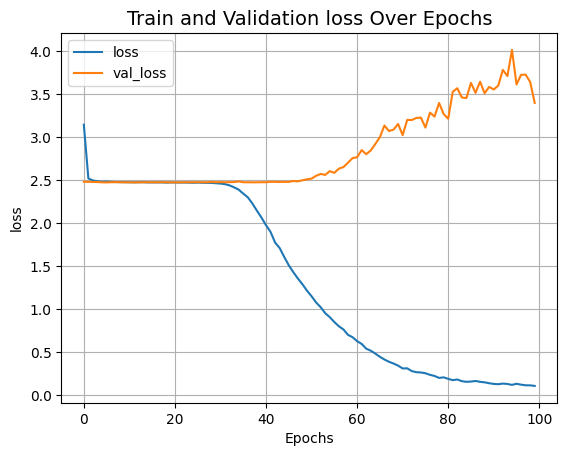

In [ ]:
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")

In [ ]:

# save numpy array as npy file
# from numpy import asarray
# from numpy import save
# define data
# data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
# save('x_train.npy', x_train)

In [ ]:
vit_classifier.save( "/content/drive/My Drive/model.keras",save_format='tf')

In [ ]:
model = keras.applications.VGG19(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128,126,3),
    pooling=None,
    classes=12,
    classifier_activation="softmax",
)
optimizer = tfa.optimizers.AdamW(
    learning_rate=learning_rate, weight_decay=weight_decay
)
model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
)
history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
    )
